<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/DS_Days/blob/November/Gr%C3%A1fico_de_Linhas_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Gráfico de Linhas

O gráfico de linha é um tipo de gráfico que mostra a informação em forma de um conjunto de pontos (*markers*) conectados por segmentos de linha reta. É um dos tipos básicos de gráficos mais usados na maioria dos problemas

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/grafico_linha.png"width="400px"></center>

Gráficos de linhas são ideais para mostrar alterações e tendências de dados em intervalos de tempo iguais.

Quando se quer observar o comportamento dos dados ao longo do tempo, usa-se o eixo x (horizontal) para representar a ordem cronológica e o eixo y para a variável dependente.



## Plotar o gráfico de linhas

Para exemplificar o gráfico de linhas, vou usar um *dataset* contendo o número de casos (mensal) de dengue para a cidade de Campinas-SP.

Além do número de casos confirmados de dengue, o *dataset* mostra ainda dados relacionados à chuva, temperaturas média, mínima e máxima do município. O período contemplado pelo conjunto de dados é de 1998 a 2015.

In [5]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# importar dados para dataframe
data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df = pd.read_csv(data)
df["data"] = pd.to_datetime(df["data"])
df.set_index("data", inplace=True)

# ver as 5 primeiras entradas
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


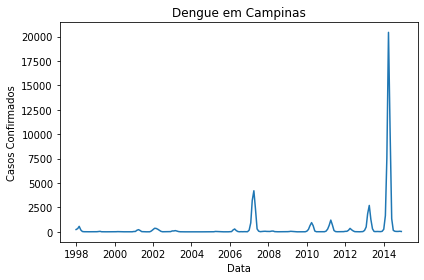

In [8]:
# plotar o número de casos confirmados
fig, ax = plt.subplots()

ax.plot("casos-confirmados", data=df)
ax.set_title("Dengue em Campinas")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

## Selecionar intervalos



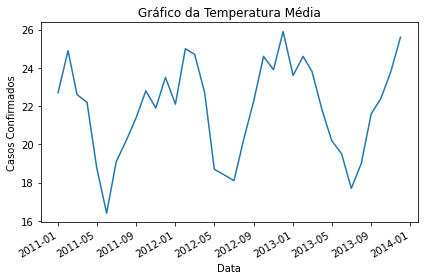

In [15]:
# plotar o histograma da temperatura média
fig, ax = plt.subplots()

#df.loc['2011-01-01':'2013-12-31'
#'2011-01-01':'2013-12-31'
ax.plot("temperatura-media", data = df.loc['2011-01-01':'2013-12-31'])
ax.set_title("Gráfico da Temperatura Média")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")
fig.autofmt_xdate()

plt.tight_layout()

In [28]:
df.loc[df["casos-confirmados"]>5000]

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
2014-03-01,7555,98.6,24.7,21.3,27.1
2014-04-01,20428,61.9,22.9,18.3,26.4
2014-05-01,10484,22.9,20.1,15.1,23.2


In [45]:
df.loc[df["casos-confirmados"] == df["casos-confirmados"].max()]

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
2014-04-01,20428,61.9,22.9,18.3,26.4


In [60]:
df.isnull().sum()/df.shape[0]

casos-confirmados       0.000000
chuva                   0.039216
temperatura-media       0.000000
temperatura-mininima    0.000000
temperatura-maxima      0.000000
dtype: float64

In [58]:
df.shape

(204, 5)

## Plotar múltiplos gráficos separadamente

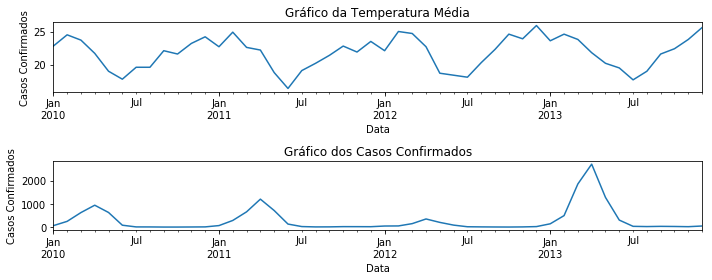

In [ ]:
# plotar o histograma da temperatura média
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,4))  # ax[0] e ax[1]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,4))

# plotar temperatura média
df.loc['2010-01-01':'2013-12-31',"temperatura-media"].plot(kind="line", ax=ax1)
ax1.set_title("Gráfico da Temperatura Média")
ax1.set_ylabel("Casos Confirmados")
ax1.set_xlabel("Data")

# plotar casos confirmados
df.loc['2010-01-01':'2013-12-31':,"casos-confirmados"].plot(kind="line", ax=ax2)
ax2.set_title("Gráfico dos Casos Confirmados")
ax2.set_ylabel("Casos Confirmados")
ax2.set_xlabel("Data")


plt.tight_layout()

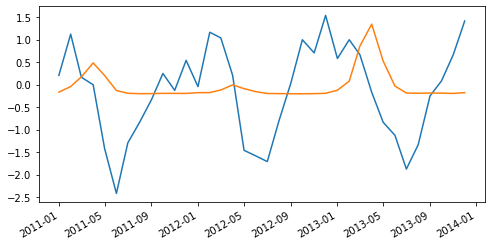

In [86]:
# plotar os gráficos normalizados
df_norm = (df - df.mean()) / df.std()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax.plot("temperatura-media", data = df_norm.loc['2011-01-01':'2013-12-31'])

ax.plot("casos-confirmados", data = df_norm.loc['2011-01-01':'2013-12-31'])

fig.autofmt_xdate()

plt.show()

## Plotar múltiplos gráficos sobrepostos

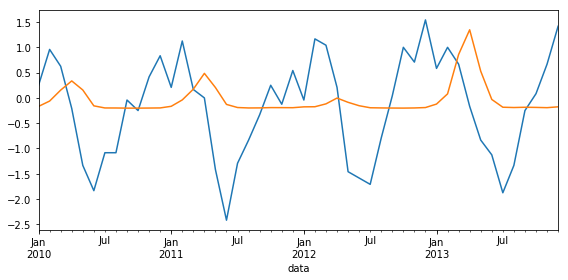

In [ ]:
# plotar os gráficos normalizados
df_norm = (df - df.mean()) / df.std()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

# plotar temperatura média
df_norm.loc['2010-01-01':'2013-12-31',"temperatura-media"].plot(kind="line",
                                                                ax=ax)
# plotar casos confirmados
df_norm.loc['2010-01-01':'2013-12-31':,"casos-confirmados"].plot(kind="line",
                                                                 ax=ax)

# eixo-x e title
ax.set_xlabel("Data")
ax.set_title("Temperatura Média X Casos Confirmados")

plt.tight_layout()